In [3]:
import pandas as pd
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Clasification

In [13]:
iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target

In [14]:
x_min , x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min , y_max = X[:,1].min() - 1, X[:,1].max() + 1
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min,y_max,h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [23]:
C = 15
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Y_pred = svc.predict(X_plot)
Y_pred = Y_pred.reshape(xx.shape)

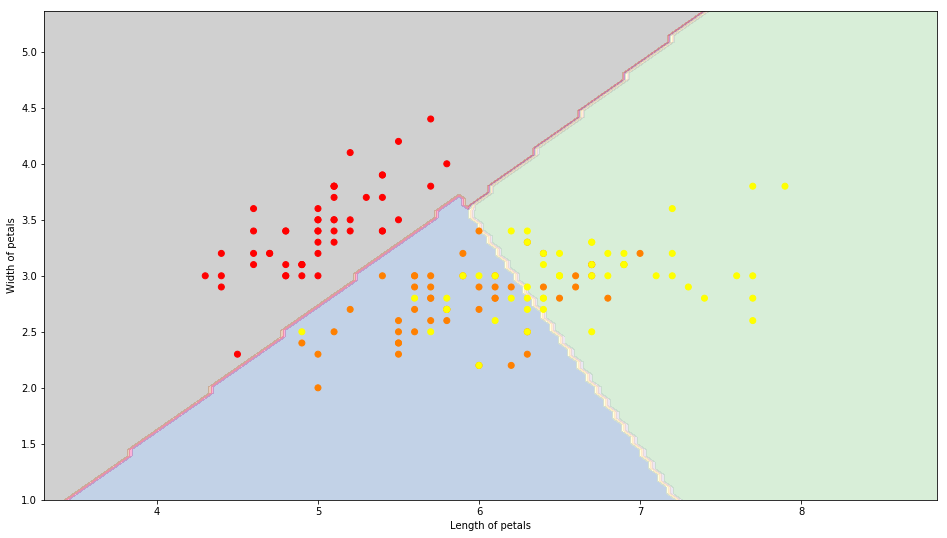

In [24]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Y_pred,cmap=plt.cm.Accent_r, alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap="autumn")
plt.xlabel("Length of petals")
plt.ylabel("Width of petals")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [26]:
X, Y = shuffle(X, Y)

In [27]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2)

In [30]:
parameters = [
    {
        "kernel":["rbf"],
        "gamma" :[1e-4,1e-3,1e-2,0.1,0.6],
        "C": [0.1, 1,10,100,1000]
    },
    {
        "kernel":["linear"],
        "C": [0.1, 1,10,100,1000]
    }
]

In [32]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"),param_grid=parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.6]}, {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [34]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for m, s , p in zip(means,stds,params):
    print("%0.3f (+/-%0.3f) for %r")%(m,s*2,p)

0.358 (+/-0.011) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.0001}
0.358 (+/-0.011) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001}
0.358 (+/-0.011) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01}
0.408 (+/-0.058) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1}
0.742 (+/-0.070) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.6}
0.358 (+/-0.011) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.358 (+/-0.011) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.583 (+/-0.153) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.800 (+/-0.125) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.792 (+/-0.092) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.6}
0.358 (+/-0.011) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.583 (+/-0.153) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.800 (+/-0.125) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.783 (+/-0.108) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.775 (+/-0.091) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.6}
0.583 (+/-0.153) for {'kernel': 'rbf', 'C': 100, 'ga

In [37]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=["Setosa","Versicolor","Virginica"]))

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        12
 Versicolor       0.50      0.86      0.63         7
  Virginica       0.83      0.45      0.59        11

avg / total       0.82      0.77      0.76        30

